In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir('/content/drive/My Drive/DL_RNN')

In [0]:
apple_training_complete = pd.read_csv('apple_training.csv')  

In [6]:
apple_training_complete.shape

(1260, 7)

In [0]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values  


In [8]:
apple_training_processed.shape

(1260, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)  

In [10]:
apple_training_scaled.shape

(1260, 1)

In [0]:
apple_training_processed #data before scaling

In [0]:
apple_training_scaled


In [0]:
features_set = []  
labels = []  
for i in range(60, 1260):  
    features_set.append(apple_training_scaled[i-60:i,0])
    labels.append(apple_training_scaled[i, 0])

In [0]:
features_set

In [0]:
features_set, labels = np.array(features_set), np.array(labels)  


In [17]:
features_set.shape

(1200, 60)

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [21]:
features_set.shape

(1200, 60, 1)

In [22]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
model = Sequential()

W0616 03:07:49.681135 140603420800896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [0]:
model.add(Dropout(0.2))  


In [0]:
model.summary()

In [0]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [0]:
model.summary()

In [0]:
model.add(Dense(units = 1))  


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [29]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)  


W0616 03:08:53.472146 140603420800896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0616 03:08:56.097819 140603420800896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0405
Epoch 2/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 3/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 4/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 5/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 6/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 7/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 8/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 9/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 10/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 11/100
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 12/100
1200/1200 [==============================] - 6s 5ms/step - lo

# Testing the LSTM

In [0]:
apple_testing_complete = pd.read_csv('apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

In [31]:
apple_testing_processed.shape

(20, 1)

Converting test data into right format
For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing

In [0]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [33]:
apple_total.shape

(1280,)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set.

In [0]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values 

In [35]:
test_inputs.shape

(80,)

Scale our test data as we did in train data

In [0]:
test_inputs = test_inputs.reshape(-1,1) 

In [37]:
test_inputs.shape

(80, 1)

In [0]:
 
test_inputs = scaler.transform(test_inputs)  

In [0]:
test_inputs[0]

In [0]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])


In [0]:
test_features = np.array(test_features) 

In [41]:
test_features.shape

(20, 60)

In [0]:
 
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [0]:
test_features.shape

In [0]:
predictions = model.predict(test_features)  

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [0]:
predictions = scaler.inverse_transform(predictions)

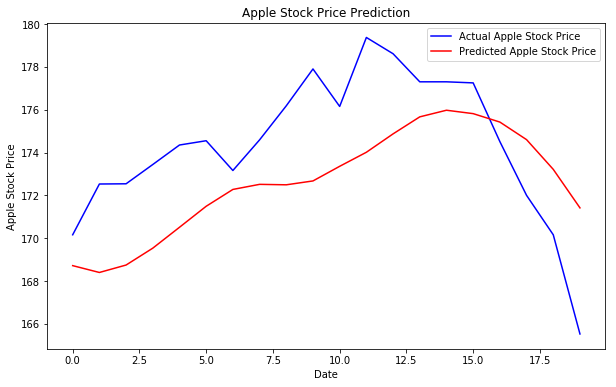

In [45]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  

Conclusion
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks. In this article, we saw how we can use LSTM for the Apple stock price prediction.